#Importing necessary python library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Uploading Automobile Dataset

In [15]:
import os

# Get the current working directory
current_dir = os.getcwd()
print("Current directory:", current_dir)


Current directory: C:\Users\Dell\Downloads


#Load the dataset

In [16]:

df = pd.read_csv('Automobile_data.csv')

#Univariate Analysis Numeric Variables Preparing Data

In [17]:
df = df.replace('?', pd.NA)

# convert data types
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# drop rows with missing values
df = df.dropna()

# reset index
df = df.reset_index(drop=True)

# display the first few rows
print(df.head())

   symboling  normalized-losses  make fuel-type aspiration num-of-doors  \
0          2              164.0  audi       gas        std         four   
1          2              164.0  audi       gas        std         four   
2          1              158.0  audi       gas        std         four   
3          1              158.0  audi       gas      turbo         four   
4          2              192.0   bmw       gas        std          two   

  body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0      sedan          fwd           front        99.8  ...          109   
1      sedan          4wd           front        99.4  ...          136   
2      sedan          fwd           front       105.8  ...          136   
3      sedan          fwd           front       105.8  ...          131   
4      sedan          rwd           front       101.2  ...          108   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.

In [18]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


#Categorical Variables

<AxesSubplot:xlabel='height', ylabel='Count'>

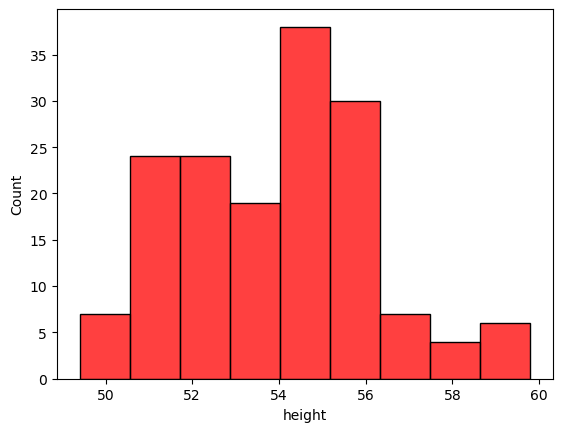

In [20]:
sns.histplot(x='height',data=df,color='red')

#Bi-Variate Analysis Numerical Variables

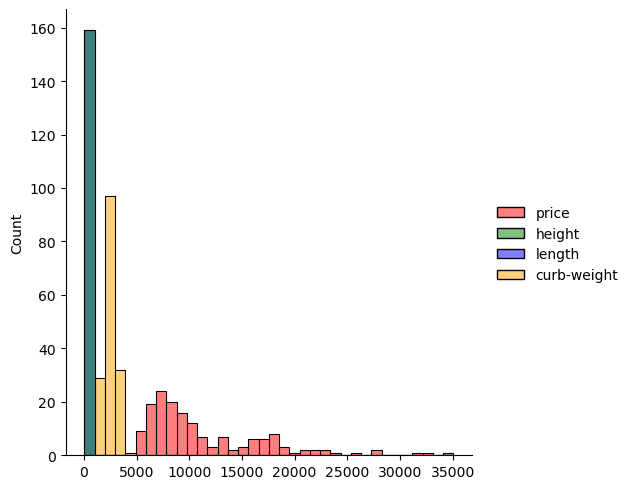

In [21]:
variables = ['price', 'height', 'length', 'curb-weight']
colors = ['red', 'green', 'blue', 'orange']

sns.displot(df[variables], palette=colors)

plt.show()

#Categorical Variables

<Figure size 1000x800 with 0 Axes>

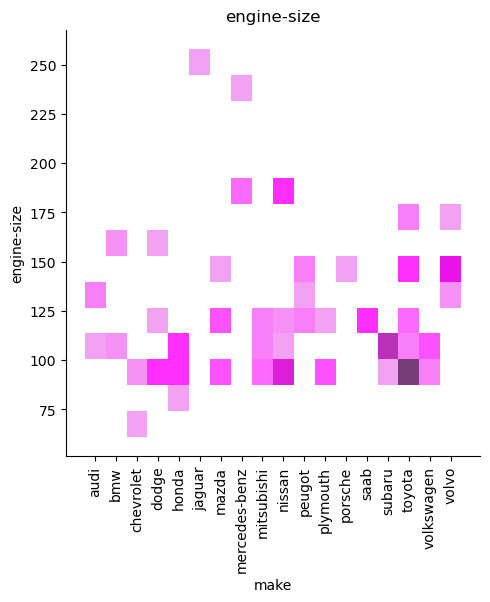

In [22]:
plt.figure(figsize=(10, 8))
sns.displot(x='make', y='engine-size', data=df,color='purple')
plt.xticks(rotation=90)
plt.title('engine-size')
plt.show()

#Muliti-Variate Analysis

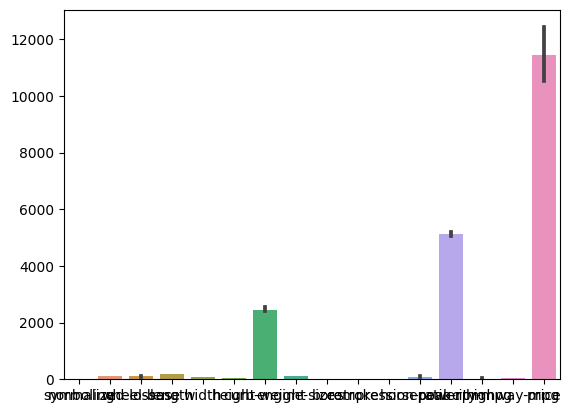

In [28]:
sns.barplot(df)
plt.show()

#Task 4: Perform data preprocessing handling missing values

In [29]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)


#Handling categorical values

In [30]:
le = LabelEncoder()
df['make'] = le.fit_transform(df['make'])
df['fuel-type'] = le.fit_transform(df['fuel-type'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['num-of-doors'] = le.fit_transform(df['num-of-doors'])
df['body-style'] = le.fit_transform(df['body-style'])
df['drive-wheels'] = le.fit_transform(df['drive-wheels'])
df['engine-location'] = le.fit_transform(df['engine-location'])
df['engine-type'] = le.fit_transform(df['engine-type'])
df['num-of-cylinders'] = le.fit_transform(df['num-of-cylinders'])
df['fuel-system'] = le.fit_transform(df['fuel-system'])

#perform scaling

In [31]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('price', axis=1)), columns=df.columns[:-1])
df_scaled['price'] = df['price']

#Task 5: Build Machine Learning Model

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Load the dataset
df = pd.read_csv("Automobile_data.csv")

# Handling missing values
df.replace('?', np.nan, inplace=True)  # replace '?' with NaN
df['normalized-losses'].fillna(df['normalized-losses'].median(), inplace=True) # replace missing values with median
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True) # replace missing values with mode

# Encode categorical variables
df = pd.get_dummies(df, columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                                 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
                                 'fuel-system'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Perform scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert numpy array to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Split data into train and test sets
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#Task 6: Evaluating Machine Learing Model

In [33]:
y_pred = lr.predict(X_test)
print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: -1.7804692480809753e+23
